In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Nov  8 05:59:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import regex as re
from nltk.tokenize import word_tokenize
from itertools import chain
# row 생략 없이 출력
# pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
pile_path = '/gdrive/MyDrive/dacon/stack_bert/transfer-learning-on-stack-exchange-tags/data/'
biology = pd.read_csv(pile_path+'biology.csv') #['id', 'title', 'content', 'tags']
cooking = pd.read_csv(pile_path+'cooking.csv')
crypto = pd.read_csv(pile_path+'crypto.csv')
diy = pd.read_csv(pile_path+'diy.csv')
robotics = pd.read_csv(pile_path+'robotics.csv')

data = {'biology':biology, 'cooking':cooking, 'crypto':crypto, 'diy':diy, 'robotics':robotics}
# print(data['biology'])

stops = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print(crypto.columns)

Index(['id', 'title', 'content', 'tags'], dtype='object')


In [ ]:

############
all_data = biology.append(cooking)
all_data = all_data.append(crypto)
all_data = all_data.append(diy)
all_data = all_data.append(robotics)
all_data = all_data.reset_index()
tag=[]
for x in range(len(all_data)):
    tag.append(all_data.tags[x].split(' '))
tag = list(chain.from_iterable(tag))
uni_tag= np.unique(tag)
print('uni=',len(uni_tag))
################

AttributeError: ignored

In [ ]:
stop_words = set(stopwords.words('english'))
def text_tokenizer(data):
    data = data.lower()
    data = re.sub(r'\<[^<>]*\>','',data)
    data = re.sub(r'^\W+|\W+$','',data)
    data = re.sub(r'\s',' ',data)
    data = re.sub(r'[^a-zA-Z0-9]',' ',data)
    data = word_tokenize(data)
    data = [i for i in data if i not in stop_words]
    # data = (lambda data: data.lower())
    # data = (lambda data: re.sub(r'\<[^<>]*\>','',data))
    # data = (lambda data: re.sub(r'^\W+|\W+$','',data))
    # data = (lambda data: re.sub(r'\s',' ',data))
    # data = (lambda data: re.sub(r'[^a-zA-Z0-9]',' ',data))
    # for i in range(len(data)):
        # sp = data[i].split(' ')
        # if sp not in stop_words

    #############
    # data = "[CLS] " + data + " [SEP]"
    # for t in data:
    #     sentence = word_tokenize(t)
    #     result = []

    #     for word in sentence:
    #         word = word.lower()
    #         if word in stop_words or len(word) <= 2:
    #             continue
    #         result.append(word)
    #         if word not in vocab:
    #             vocab[word] = 0
    #         vocab[word] += 1
    #     sentences.append(result)
    return data#, sentences

# content = text_tokenizer(all_data.content)
for i in range(len(all_data)):
    all_data.content[i] =text_tokenizer(all_data.content[i])
    all_data.title[i]  =text_tokenizer(all_data.title[i])
# all_data.content[0] =text_tokenizer(all_data.content[0])
# print(all_data.content[0])
# title_senteneces, title_vocab = text_tokenizer(all_data.title)
#print(sorted(vocab.items(), key = lambda x:x[1], reverse = True)[:50])
##############################################

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# print(all_data.content)
# print(all_data.title)
print(len(all_data.content))
print(len(all_data.title))
uni_all_data = all_data.content.values + all_data.title.values
cont_title = uni_all_data
# uni_all_data = np.concatenate((all_data.content.values, all_data.title.values),axis=1)
# uni_all_data = all_data[['content','title','tags']].unique()
print(type(uni_all_data))
print(uni_all_data[0][0])

uni_all_data=np.unique(uni_all_data)
print(len(uni_all_data))

67721
67721
<class 'numpy.ndarray'>
prokaryotic
67712


리뷰의 최대 길이 : 2967
리뷰의 평균 길이 : 65.11334770793951


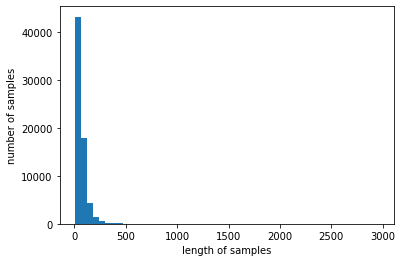

In [ ]:
import matplotlib.pyplot as plt

#  길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in uni_all_data))
print('리뷰의 평균 길이 :',sum(map(len, uni_all_data))/len(uni_all_data))
plt.hist([len(s) for s in uni_all_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
print( all_data.content)

0        [prokaryotic, translation, critical, efficient...
1        [anyone, suggestions, prevent, rnase, contamin...
2        [tortora, writes, principles, anatomy, physiol...
3        [various, people, lab, prepare, liter, lb, add...
4        [cases, splicing, machinery, constructs, mrna,...
                               ...                        
67716    [particular, example, robot, interests, http, ...
67717    [thought, technique, increase, resolution, pov...
67718    [robotics, project, raspberry, pi, arduino, ar...
67719    [understand, 2d, laser, scanner, scanned, data...
67720    [hey, trying, research, swarm, robotics, tryin...
Name: content, Length: 67721, dtype: object


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
tokenizer = Tokenizer()
tokenizer.fit_on_texts( all_data.content)
tokenizer.fit_on_texts(all_data.title)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(all_data.title)

data = pad_sequences(sequences, maxlen=500)
print(data)
print(len(tokenizer.word_index))
vocab_size = len(tokenizer.word_index) + 1

[[    0     0     0 ...  3411  7681  3159]
 [    0     0     0 ...   156  2448  7410]
 [    0     0     0 ... 18770    14  1906]
 ...
 [    0     0     0 ...  1139  2484  1125]
 [    0     0     0 ... 14175  6681  1688]
 [    0     0     0 ...  1908  8745  1721]]
96577


In [ ]:
text = np.array(all_data.content.values) +  np.array(all_data.title.values)
pad_mat_uni_all_data= tokenizer.texts_to_sequences(text)
pad_mat_uni_all_data=pad_sequences(pad_mat_uni_all_data, maxlen=500)
pad_mat_uni_all_data = np.array(pad_mat_uni_all_data)

In [ ]:
print(uni_tag)
print(len(uni_tag))

['120-240v' '240v' '2nd-preimage-resistance' ... 'zero-knowledge-proofs'
 'zoology' 'zucchini']
2668


In [ ]:
dict_uni_tag = {string : i for i,string in enumerate(uni_tag)}
print(dict_uni_tag)

{'120-240v': 0, '240v': 1, '2nd-preimage-resistance': 2, '3d-model': 3, '3d-printing': 4, '3d-reconstruction': 5, '3d-structure': 6, '3des': 7, 'abe': 8, 'abiogenesis': 9, 'abs': 10, 'accelerometer': 11, 'access-control': 12, 'access-panel': 13, 'accessibility': 14, 'accumulators': 15, 'acid': 16, 'acidity': 17, 'acoustic': 18, 'acoustic-cryptanalysis': 19, 'acoustic-rangefinder': 20, 'acrylic': 21, 'action-potential': 22, 'activerobot': 23, 'actuator': 24, 'adaptation': 25, 'addiction': 26, 'addition': 27, 'additives': 28, 'adhesive': 29, 'adversarial-model': 30, 'advice': 31, 'aes': 32, 'afci': 33, 'affine-cipher': 34, 'african': 35, 'aging': 36, 'agriculture': 37, 'aids': 38, 'air-conditioner': 39, 'air-conditioning': 40, 'air-filter': 41, 'air-leaks': 42, 'air-muscle': 43, 'air-quality': 44, 'alarm': 45, 'alcohol': 46, 'alcohol-content': 47, 'alfredo': 48, 'algebraic-attack': 49, 'algebraic-eraser': 50, 'algorithm': 51, 'algorithm-design': 52, 'alkalinity': 53, 'alkyd': 54, 'allele

In [ ]:
dict_mat_uni_tags=np.zeros((len(all_data.tags),len(uni_tag)))
for c, i in enumerate(all_data.tags):
    for k, j in enumerate(i.split(' ')):
        # print(dict_mat_uni_tags[c])
        # print(k, j)
        # print(c , dict_uni_tag[j])
        dict_mat_uni_tags[c][dict_uni_tag[j]]=1

In [ ]:
print(dict_mat_uni_tags[67681][0:500])
print(dict_mat_uni_tags.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split as tts
from keras import backend as K

In [ ]:
@tf.function
def round_layer(tensor):
    if tensor >= 0.5:
        tensor = 1
    else:
        tensor = 0
    # return round(tensor)
    return tensor
def create_model(max_seq_lenght,uni_tag,vocab_size):
    input = tf.keras.layers.Input(shape=(max_seq_lenght), dtype=tf.int32, name='input')

    # hiden = tf.keras.layers.Embedding(vocab_size,500)(input)
    # hiden = tf.keras.layers.LSTM(300,return_sequences=True)(hiden)
    hiden = tf.keras.layers.Dense(300)(input)

    hiden = tf.keras.layers.Dense(124,activation='relu')(hiden)

    drop = tf.keras.layers.Dropout(0.4)(hiden)

    # hiden2 = tf.keras.layers.LSTM(300, return_sequences=False)(drop)
    hiden2 = tf.keras.layers.Dense(300)(drop)
    hiden2 = tf.keras.layers.Dense(124,activation='relu')(hiden2)

    output = tf.keras.layers.Dense(len(uni_tag), activation='sigmoid' ,name='output')(hiden2)
    # output = tf.keras.layers.Lambda(round_layer, name='output')(output)
    # output = tf.keras.layers.Lambda(lambda x: K.round(x),name='output')(output)
    model = tf.keras.Model(inputs = input,
                           outputs = output)
    return model

In [ ]:
max_seq_lenght=500
model = create_model(max_seq_lenght, uni_tag, vocab_size)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=[tf.keras.metrics.binary_accuracy])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 500)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_6 (Dense)              (None, 124)               37324     
_________________________________________________________________
dropout_1 (Dropout)          (None, 124)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               37500     
_________________________________________________________________
dense_8 (Dense)              (None, 124)               37324     
_________________________________________________________________
output (Dense)               (None, 2668)              3335

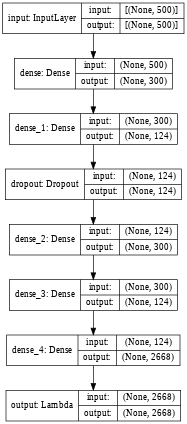

In [ ]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=48)

In [ ]:
# print(train_x)
# print(train_y)
# print(test_x)
for i in test_y:
    print(np.where(i==1))


In [ ]:
train_x, test_x = tts(pad_mat_uni_all_data)
train_y, test_y = tts(dict_mat_uni_tags,)
# train_x, test_x = pad_mat_uni_all_data[:int(len(pad_mat_uni_all_data)*0.8)], pad_mat_uni_all_data[int(len(pad_mat_uni_all_data)*0.8):]
# train_y, test_y =  dict_mat_uni_tags[:int(len(dict_mat_uni_tags)*0.8)], dict_mat_uni_tags[int(len(dict_mat_uni_tags)*0.8):]
epochs = 6
print(np.array(train_x).shape)
print(train_y.shape)
print(np.where(train_y[2]==1))
hisroty = model.fit(train_x,train_y,
                    validation_data=(test_x,test_y),
                    epochs=epochs,
                    verbose=1)

(50790, 500)
(50790, 2668)
(array([1832, 2047]),)
Epoch 1/6


ValueError: ignored

In [ ]:
print(dict_mat_uni_tags.shape)
print(dict_mat_uni_tags[4][0:500])

(67721, 2668)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
model.save(pile_path+'stack_model_tokenizer2.h5')

In [ ]:
model = keras.models.load_model(pile_path+'stack_model_tokenizer2.h5')

In [ ]:
predict_data = pd.read_csv(pile_path+'test.csv')

In [ ]:
print(predict_data)

           id                                              title  \
0           1  What is spin as it relates to subatomic partic...   
1           2  What is your simplest explanation of the strin...   
2           3   Lie theory, Representations and particle physics   
3           7                 Will Determinism be ever possible?   
4           9                               Hamilton's Principle   
...       ...                                                ...   
81921  278119                     Kinematics (Projectile Motion)   
81922  278120         How is lift generated due to Coanda effect   
81923  278121               Why is a resonance curve asymmetric?   
81924  278124  What are the forces acting during a drop impac...   
81925  278126            Gravity manipulation i s it a possibly?   

                                                 content  
0      <p>I often hear about subatomic particles havi...  
1      <p>How would you explain string theory to non ...  
2     

In [ ]:
text = np.array(predict_data.content.values) +  np.array(predict_data.title.values)
pad_mat_predict_data= tokenizer.texts_to_sequences(text)
pad_mat_predict_data=pad_sequences(pad_mat_predict_data, maxlen=500)
pad_mat_predict_data = np.array(pad_mat_predict_data)

In [ ]:
print(pad_mat_predict_data.shape)

(81926, 500)


In [ ]:
# result = model.predict(pad_mat_predict_data)
result = model.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score
print(result)
result = result.round()
print(result)
print(result.shape)
acc = accuracy_score(test_y, result)
print(acc)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(16931, 2668)
0.000708759080975725
